## Este notebook gera uma visualização do atraso das notificações de óbitos por COVID-19 usando regressão linear

In [1]:
from datetime import date, datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('_data/INFLUD21-12-07-2021.csv',  error_bad_lines=False, encoding = "ISO-8859-1", sep=';')

/home/felix/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (15,18,60,62,63,64,92,94,106,108,115,117,118,119,123,144) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
cases = df[["SG_UF_NOT","CLASSI_FIN", "EVOLUCAO", "DT_EVOLUCA", "DT_ENCERRA", "PCR_SARS2"]]

In [4]:
cases = cases[cases["EVOLUCAO"] == 2]

In [5]:
cases = cases[(cases["CLASSI_FIN"] == 5) | (cases["PCR_SARS2"] == 1)]

In [6]:
cases["DT_EVOLUCA"] = pd.to_datetime(cases["DT_EVOLUCA"], format='%d/%m/%Y', errors='coerce')

In [7]:
cases["DT_ENCERRA"] = pd.to_datetime(cases["DT_ENCERRA"], format='%d/%m/%Y', errors='coerce')

#### Após selecionar as colunas de interesse e formatar as datas, fiz a diferença entre data do óbito e a data da notificação do óbito em dias

In [8]:
cases["DIAS"] = (cases["DT_ENCERRA"] - cases["DT_EVOLUCA"]).dt.days

In [9]:
cases.shape

(282069, 7)

In [10]:
cases["DIAS"][cases["DIAS"] < 0].count()

6286

In [11]:
pos_days = cases["DIAS"] > 0

In [12]:
cases = cases[pos_days]

In [13]:
cases = cases.sort_values("DT_ENCERRA")

In [14]:
cases.head(10)

,SG_UF_NOT,CLASSI_FIN,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,PCR_SARS2,DIAS
479620,MS,5.0,2.0,2021-01-03,2021-01-04,1.0,1.0
1215106,SE,5.0,2.0,2021-01-03,2021-01-04,1.0,1.0
514533,RS,5.0,2.0,2021-01-03,2021-01-04,NaN,1.0
468039,AM,5.0,2.0,2021-01-04,2021-01-05,NaN,1.0
566756,SP,5.0,2.0,2021-01-05,2021-01-06,NaN,1.0
972896,AM,5.0,2.0,2021-01-05,2021-01-06,NaN,1.0
23743,SP,5.0,2.0,2021-01-05,2021-01-06,1.0,1.0
1121517,RO,5.0,2.0,2021-01-06,2021-01-07,NaN,1.0
503324,MS,5.0,2.0,2021-01-04,2021-01-07,1.0,3.0
1154089,MG,5.0,2.0,2021-01-06,2021-01-07,1.0,1.0


#### Aqui fiz um filtro para pegar os dados referentes a apenas o estado do RJ.

In [15]:
cases_rj = cases[cases['SG_UF_NOT'] == 'RJ'][['SG_UF_NOT','DT_ENCERRA','DIAS']].groupby('DT_ENCERRA').mean().reset_index()

#### Como não trabalha valores datetime, adicionei uma coluna 'NUM' para servir de índice.

In [16]:
cases_rj['NUM'] = [i for i in range(0, cases_rj.shape[0])]

<AxesSubplot:xlabel='NUM', ylabel='DIAS'>

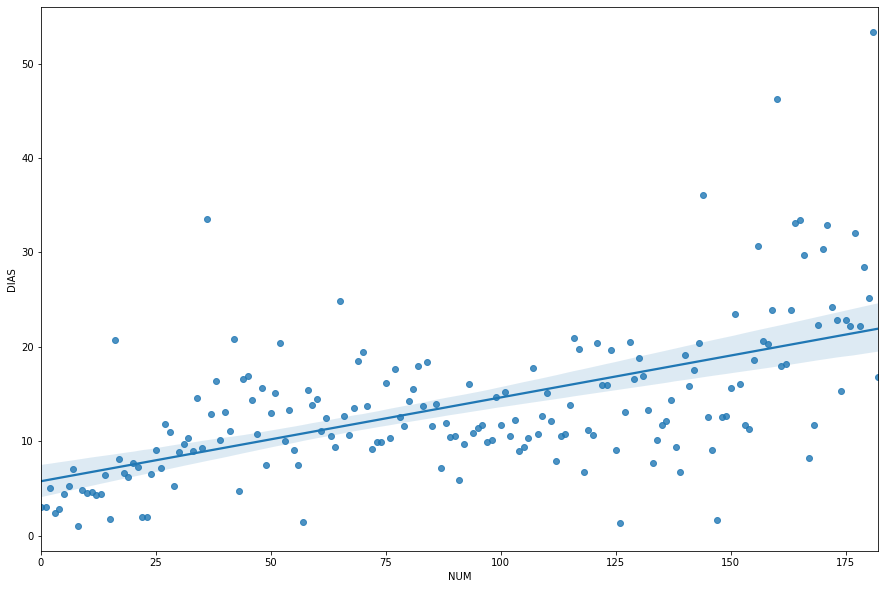

In [17]:
plt.figure(figsize=(15,10))
sns.regplot(data=cases_rj, x='NUM', y='DIAS')

In [18]:
cases_rj.describe()

,DIAS,NUM
count,183.000000,183.000000
mean,13.834843,91.000000
std,8.004002,52.971691
min,1.000000,0.000000
25%,9.097163,45.500000
50%,12.248619,91.000000
75%,17.260358,136.500000
max,53.361111,182.000000


### E fim